#   # 주제 - 서울시 자동차 교통 사고량 예측 모델 
###    (날씨, 유류량, 인구, 자동차수 변수에 따른 서울시 일일 평균 교통 사고량 예측)


* Feature 값 설명

|     |    변수명           | 변수설명                    | 단위     | 특성       |
|-----|-------------------|-----------------------------|----------|------------|
| y   | accident/day      | 일 평균 교통사고수         | 수       | real       |
| x1  | taxi_driver       | 당월 일반택시 운전자수      | 명       | real       |
| x2  | gasolin           | 한 달 가솔린 소비량         | 1000배럴 | real       |
| x3  | diesel            | 한 달 디젤 소비량           | 1000배럴 | real       |
| x4  | LPG               | 한 달 LPG 소비량            | 1000배럴 | real       |
| x5  | temp              | 한 달 평균 기온             | 섭씨     | real       |
| x6  | temp_max          | 한 달 평균 최고기온         | 섭씨     | real       |
| x7  | temp_min          | 한 달 평균 최저기온         | 섭씨     | real       |
| x8  | temp_dif          | 한 달 평균 일교차           | 섭씨     | real       |
| x9  | rainfall          | 한 달 강수량               | mm       | real       |
| x10 | humidity          | 한 달 평균 습도             | %        | real       |
| x11 | humidity_min      | 한 달 평균 최저습도         | %        | real       |
| x12 | dew_point         | 한 달 평균 이슬점           | 섭씨     | real       |
| x13 | sun               | 한 달간 일조시간            | 시간     | real       |
| x14 | wind_spd_mean     | 한 달 평균 풍속             | m/s      | real       |
| x15 | wind_spd_max      | 한 달 평균 최고풍속         | m/s      | real       |
| x16 | rainfall_day      | 한 달간 강수일              | 일       | int (0~31) |
| x17 | frost             | 한 달간 서리 내린 날 수     | 일       | int (0~31) |
| x18 | fog               | 한 달간 안개낀 날 수        | 일       | int (0~31) |
| x19 | snow              | 한 달간 눈 온 날 수         | 일       | int (0~31) |
| x20 | yellow_sand       | 한 달간 황사 온 날 수       | 일       | int (0~31) |
| x21 | thunderbolts      | 한 달간 번개친 날 수        | 일       | int (0~31) |
| x22 | weather_condition | 한 달간 흐린 날 수          | 일       | int (0~31) |
| x23 | total_population  | 당월 인구수                 | 명       | int        |
| x24 | population(0~19)  | 당월 (0~19세) 인구         | 명        |  int      |
| x25 | population(20~59) | 당월 (20~59세) 인구        | 명        |  int      |
| x26 | population(60~)   | 당월 60세 이상 인구         | 명       | int        |
| x27 | total_vehicle     | 당월 자동차수               | 대       | int        |
| x28 | sedan             | 당월 승용차수               | 대       | int        |
| x29 | van               | 당월 승합차수               | 대       | int        |
| x30 | truck             | 당월 화물차수               | 대       | int        |
| x31 | special_car       | 당월 특수차수               | 대       | int        |
| x32 | bicycle           | 당월 2륜차수                | 대       | int        |

### 출처
1. 교통사고수 - 도로교통공단(http://taas.koroad.or.kr/web/shp/sbm/initStatsAnals.do?menuId=WEB_KMP_STA)
2. 택시운전자수 - 전국택시운송사업조합연합회(http://www.taxi.or.kr/04/01_view.php?no=95)
3. 기온 - 기상청 기상정보(http://www.kma.go.kr/weather/main.jsp) 
4. 유류량 - KOSIS(http://kosis.kr/statisticsList/statisticsList_01List.jsp?vwcd=MT_ZTITLE&parentId=I#SubCont)
5. 인구 - 서울 통계 DB 인구(http://stat.seoul.go.kr/jsp3/stat.db.jsp?cot=017&srl_dtl=10001)
6. 자동차 등록대수 - 국가지표체계(http://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1257)

# ================================================

# * Feature에 대한 고민 (1)
1. 교통사고량에 영향을 많이 끼칠 것으로 예상되는 **주 도로의 차로 수 및 좌회전 교통량, 주.부도로의 차선 수** 등과 같은 **교통량 및 도로의 형태적 특성**을 데이터로 활용하고자 했지만 데이터를 구할 수 없었다.
2. 각 달마다 다른 날짜를 고려하기 위해 days, 각 달마다 기상상태를 나타내는 **frost**(한 달간 서리 내린 날 수), **fog**(한 달간 안개낀 날 수), **snow**(한 달간 눈 온 날 수), **yellow_sand**(한 달간 황사 온 날 수), **thunderbolts**(한 달 간 번개친 날 수)는 **weathre_condition**(한 달 간 흐린 날 수)와 days feature를 이용해 **weather_condition_per**(한 달 평균 흐린 날의 수) feature를 만들어 추가시켰다.
3. 원래 10세 단위로 나누어져 있던 **인구** 데이터는 실제 운전을 가장 많이 하는 성인 연령을 중심으로 미성년 연령(0~19세), 성인 연령(20~59세), 고령층(60세~)으로 조합해 feature를 생성했다.

# ================================================

# * 예측치에 대한 고민
1. 문제 : 당월데이터로는 당월 사고량을 예측할 수 없었다.(예측 시기의 문제)
2. 해결방안 :
 - 1. 기존 데이터 y값들을 한 칸씩 내려서 전월 데이터로 당일 사고량을 예측하는 모델을 고안하는 방법
 - 2. 당월 데이터를 Row X 데이터들간의 관계로 예측해서 예측용 데이터로 생성시켜 활용하는 방법
3. 결론 : y값 변경(기존 : 서울시 당월 전체 사고량 예측 -> 변경 : 서울시 당월 일 평균 사고량 예측)
  - 한 달이 각각 다른 일수를 가지기 때문에 days가 X feature값으로 들어가면 절대적인 영향력을 가진다(OLS 시행 후 summary를 통해 확인)

# ================================================

In [46]:
import numpy as np
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1-1. Statsmodels를 이용한 회귀 모형 분석 

In [48]:
# Pandas를 이용해 excel에 담긴 데이터를 Dataframe에 담는다.
df1_sci = pd.read_excel('teamproject_data.xlsx', sheetname =2)
df11 = scale(df1_sci)
df1 = pd.DataFrame(data = df11, columns = df1_sci.columns)
df1.head()

,taxi_driver,gasolin/day,Diesel/day,LPG/day,temp,rainfall/day,humidity,dew_point,wind_spd_max,weather(5),weather(weighted),population(0~19),population(20~59),population(60~),sedan,van,truck,special_car,bicycle,accident/day
0,0.261894,-0.681584,0.579235,2.176717,-1.412185,-0.573986,-1.247109,-1.474496,-1.232949,1.047124,1.183833,1.542326,1.248645,-1.683103,-1.735758,1.575120,1.977237,-1.139035,-1.218803,-2.872821
1,0.274306,0.339946,0.437387,2.577366,-1.363129,-0.579949,-1.731815,-1.537737,-0.295543,1.202015,1.248332,1.507612,1.326820,-1.632348,-1.605735,1.564404,1.956206,-1.136993,-1.228022,-2.144083
2,0.287282,-0.234997,0.736272,2.507881,-0.529186,-0.376452,-0.520049,-0.562018,-0.358037,0.272672,0.280841,1.487958,1.241936,-1.591625,-1.508212,1.544548,1.903147,-1.120661,-1.201389,-1.028547
3,0.550181,0.859496,0.882186,1.963235,0.137969,-0.453483,-1.247109,-0.146433,1.266799,-0.656671,-0.751149,1.467921,1.235017,-1.561144,-1.399877,1.521098,1.861084,-1.131889,-1.167911,-0.010910
4,0.673168,0.466783,0.566148,2.389608,0.491168,-0.137447,-0.277696,0.341427,-0.108062,0.117781,-0.235154,1.444586,1.206022,-1.530213,-1.292133,1.509878,1.839170,-1.106370,-1.132338,1.044672


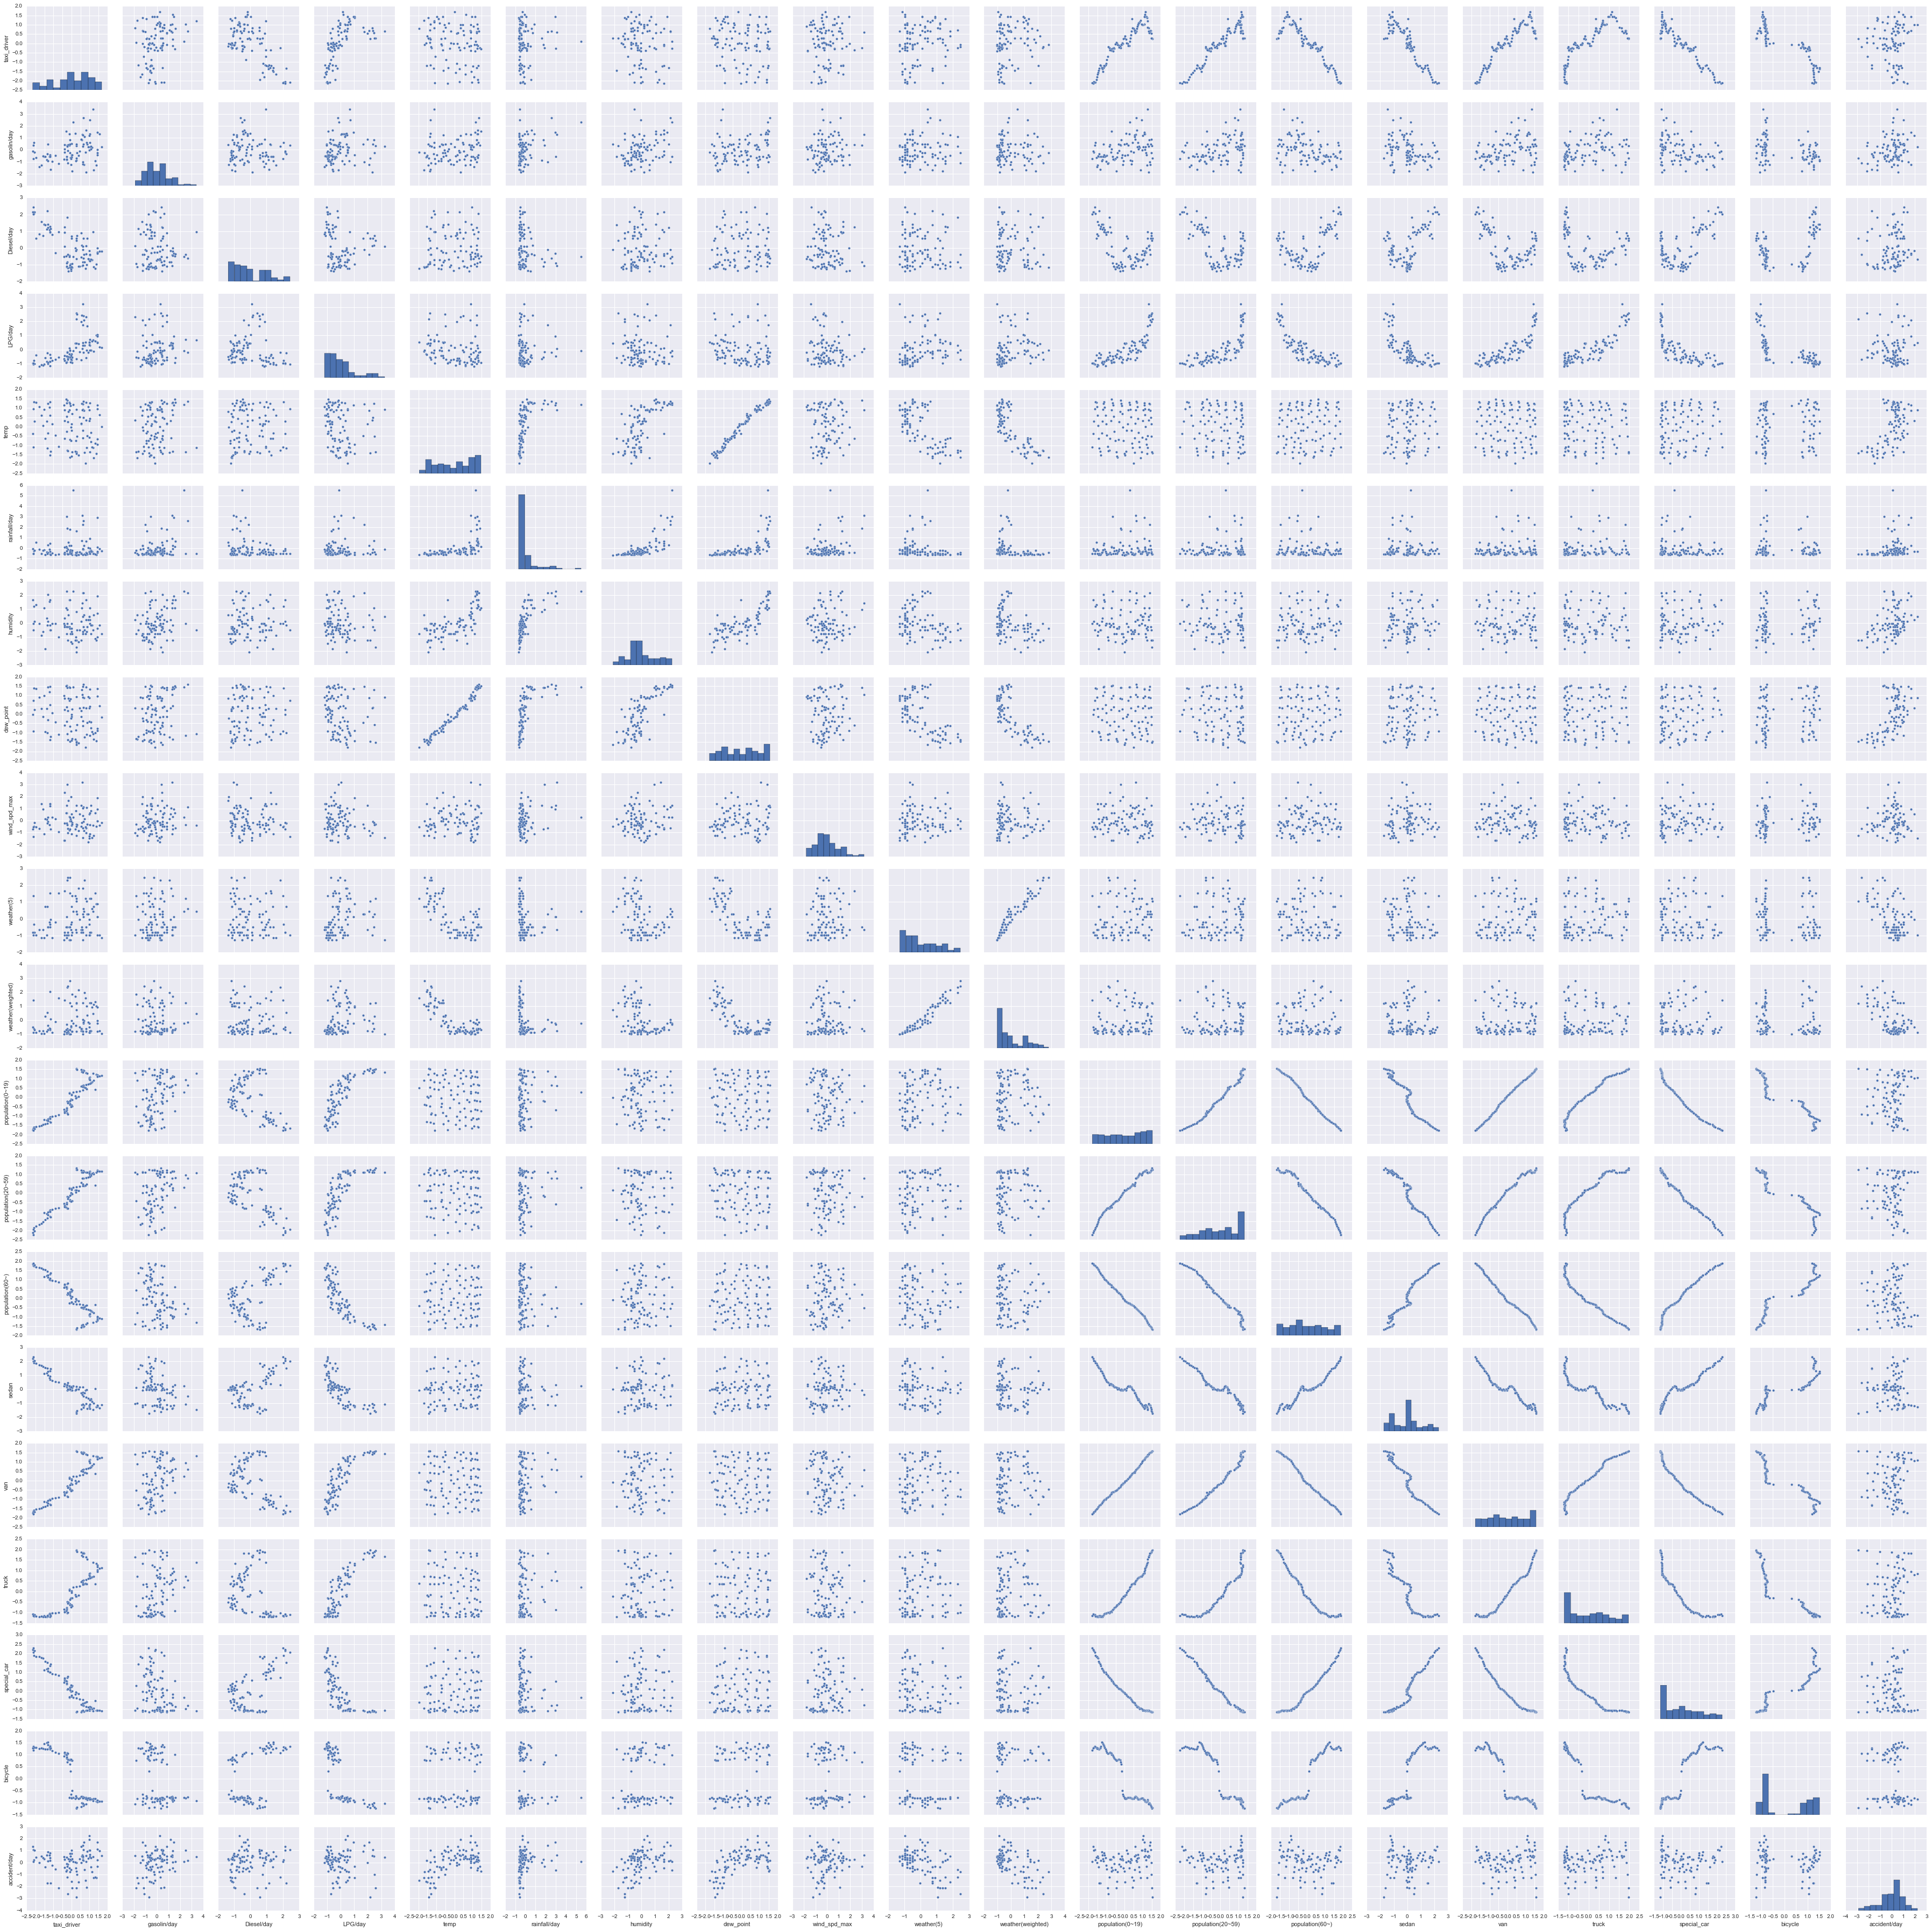

In [141]:
sns.pairplot(df1) # feature들 간의 상관관계 확인
plt.show()

In [8]:
corr_result = df1.corr()
corr_y = corr_result['accident/day']
selected = corr_y.index[corr_y>0.1] # y값과의 corr값이 0.1이상인 feature만 선택
df1[selected[:-1]].head()

,gasolin/day,Diesel/day,temp,rainfall/day,humidity,dew_point,population(0~19),van,truck
0,-0.681584,0.579235,-1.412185,-0.573986,-1.247109,-1.474496,1.542326,1.575120,1.977237
1,0.339946,0.437387,-1.363129,-0.579949,-1.731815,-1.537737,1.507612,1.564404,1.956206
2,-0.234997,0.736272,-0.529186,-0.376452,-0.520049,-0.562018,1.487958,1.544548,1.903147
3,0.859496,0.882186,0.137969,-0.453483,-1.247109,-0.146433,1.467921,1.521098,1.861084
4,0.466783,0.566148,0.491168,-0.137447,-0.277696,0.341427,1.444586,1.509878,1.839170


In [20]:
xs_corr = df1[selected].corr()
xs_corr

,gasolin/day,Diesel/day,temp,rainfall/day,humidity,dew_point,population(0~19),van,truck,accident/day
gasolin/day,1.000000,-0.071737,0.197173,0.328199,0.299480,0.234382,0.342043,0.330688,0.295001,0.276809
Diesel/day,-0.071737,1.000000,0.023993,-0.215128,0.055409,0.029079,-0.492043,-0.457639,-0.324027,0.112400
temp,0.197173,0.023993,1.000000,0.538417,0.674473,0.987867,-0.054074,-0.044468,-0.040422,0.576345
rainfall/day,0.328199,-0.215128,0.538417,1.000000,0.705628,0.600958,0.121193,0.115284,0.097027,0.204851
humidity,0.299480,0.055409,0.674473,0.705628,1.000000,0.779747,-0.045633,-0.036136,-0.039120,0.400085
dew_point,0.234382,0.029079,0.987867,0.600958,0.779747,1.000000,-0.053584,-0.043668,-0.041855,0.570338
population(0~19),0.342043,-0.492043,-0.054074,0.121193,-0.045633,-0.053584,1.000000,0.997942,0.970114,0.102741
van,0.330688,-0.457639,-0.044468,0.115284,-0.036136,-0.043668,0.997942,1.000000,0.976267,0.112691
truck,0.295001,-0.324027,-0.040422,0.097027,-0.039120,-0.041855,0.970114,0.976267,1.000000,0.124618
accident/day,0.276809,0.112400,0.576345,0.204851,0.400085,0.570338,0.102741,0.112691,0.124618,1.000000


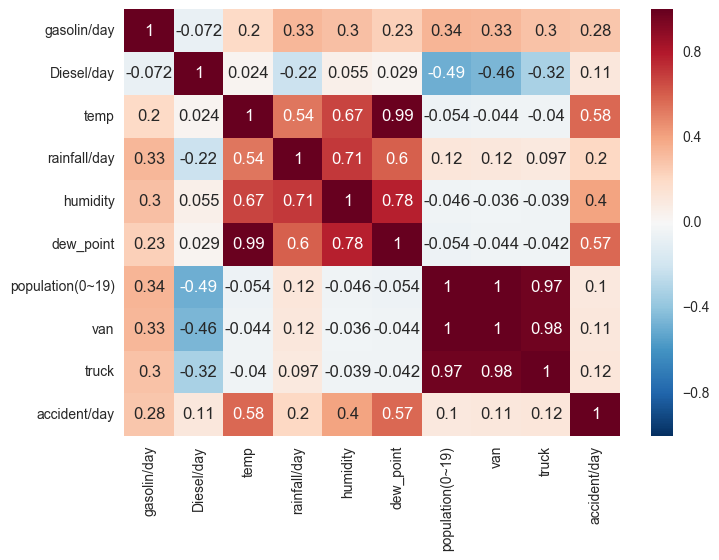

In [31]:
sns.heatmap(xs_corr, annot=True)
plt.show()

# ===============================================

# * Feature에 대한 고민 (2)
1. 각 month마다 다른 days에 의해서 영향을 받는 **유류 소비량, 강수량, 사고량(y값)**들에 대해서는 'day'(각 월의 일 수)값으로 나누어 주었다.
2. 같은 카테고리에 있고 상관계수가 높다고 판단된 weather(5)들은 임의의 가중 평균을 활용하여 합치는 방법 weather(weighted)을 사용했다.
3. pairplot상에서 약간의 이분산성이 있다고 판단된 Feature들은 로그 값으로 변화시키고 statesmodels에서 제공하는 scaling으로 전처리 과정을 진행했다.

# ===============================================

In [32]:
df_accident = sm.add_constant(df1)
df_accident.tail()

,const,taxi_driver,gasolin/day,Diesel/day,LPG/day,temp,rainfall/day,humidity,dew_point,wind_spd_max,...,weather(weighted),population(0~19),population(20~59),population(60~),sedan,van,truck,special_car,bicycle,accident/day
91,1,-2.096302,0.615645,2.058004,-0.791929,1.334922,-0.272774,1.176423,1.398456,-0.483024,...,-0.622151,-1.613251,-1.851511,1.714006,1.877699,-1.596863,-1.180719,1.896775,1.319950,0.189310
92,1,-2.097994,0.376048,2.437293,-1.037148,0.952290,-0.523966,-0.520049,0.720873,-1.357936,...,-0.880148,-1.656338,-1.942033,1.758089,1.994461,-1.637647,-1.106147,2.054997,1.346490,1.040538
93,1,-2.062452,-0.192465,2.143066,-1.010733,0.275324,-0.225846,0.085833,0.242048,-0.170556,...,-0.686650,-1.699501,-2.035776,1.797364,2.066950,-1.688139,-1.094508,2.144826,1.304818,0.993796
94,1,-2.147076,-0.107401,2.139794,-0.963819,-0.372208,-0.080769,1.661129,-0.038020,-0.732999,...,-0.493152,-1.742171,-2.115050,1.831648,2.214743,-1.728987,-1.084715,2.220364,1.264030,1.313258
95,1,-2.126766,-0.745382,2.018744,-0.975252,-1.088419,-0.511779,-0.035343,-0.932430,-0.545518,...,1.441831,-1.788798,-2.240789,1.868779,2.319998,-1.785404,-1.141226,2.281611,1.191860,0.065299


In [37]:
model_accident2 = sm.OLS(df_accident.ix[:, -1], df_accident.ix[:, :-1])
result_accident2 = model_accident2.fit()
print(result_accident2.summary())

                            OLS Regression Results                            
Dep. Variable:           accident/day   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     5.123
Date:                Fri, 11 Nov 2016   Prob (F-statistic):           1.32e-07
Time:                        19:31:05   Log-Likelihood:                -96.641
No. Observations:                  96   AIC:                             233.3
Df Residuals:                      76   BIC:                             284.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const               2.03e-15      0.07

#### -  p-value가 너무 높거나 상관관계가 높을 것으로 예상되는 feature들을 차례대로 제거하는 방법으로 성능을 개선시켰다. 
(제거 과정은 excel 파일의 각 sheet에 기입)

In [51]:
df1_sci_1 = pd.read_excel('teamproject_data.xlsx', sheetname =10) 
df12 = scale(df1_sci_1)
df_bw = pd.DataFrame(data = df12, columns = df1_sci_1.columns)
df_bw.head()

,Diesel/day,LPG/day,temp,rainfall/day,population(0~19),sedan,accident/day
0,0.579235,2.176717,-1.412185,-0.573986,1.542326,-1.735758,-2.872821
1,0.437387,2.577366,-1.363129,-0.579949,1.507612,-1.605735,-2.144083
2,0.736272,2.507881,-0.529186,-0.376452,1.487958,-1.508212,-1.028547
3,0.882186,1.963235,0.137969,-0.453483,1.467921,-1.399877,-0.010910
4,0.566148,2.389608,0.491168,-0.137447,1.444586,-1.292133,1.044672


In [42]:
df_accident_bw = sm.add_constant(df_bw)
model_accident_bw2 = sm.OLS(df_accident_bw.ix[:, -1], df_accident_bw.ix[:, :-1])
result_accident_bw2 = model_accident_bw2.fit()
print(result_accident_bw2.summary())

                            OLS Regression Results                            
Dep. Variable:           accident/day   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     11.68
Date:                Fri, 11 Nov 2016   Prob (F-statistic):           1.30e-09
Time:                        19:36:46   Log-Likelihood:                -108.34
No. Observations:                  96   AIC:                             230.7
Df Residuals:                      89   BIC:                             248.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const              2.03e-15      0.079  

## =========================================================

# 1-2.  Random Forest 모델 분석

In [56]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pylab as plt

In [58]:
df1_sci = pd.read_excel('teamproject_data.xlsx', sheetname = 17)
del df1_sci['days']
df1 = pd.DataFrame(data = df1_sci, columns = df1_sci.columns)
df1.head()

,taxi_driver,gasolin_d,diesel_d,lpg_d,temp,temp_max,temp_min,temp_dif,rain_per_d,humidity,...,population(0~19),population(20~59),population(60~),total_vehicle,sedan,van,truck,special_car,bicycle,accident_d
0,40996,27.129032,30.806452,41.064516,-1.7,1.9,-5.0,6.9,0.570968,50,...,2243722,6670721,1287213,2946607,2361364,195238,386614,3391,401635,84.000000
1,41018,28.678571,30.107143,43.250000,-1.2,3.2,-4.9,8.1,0.535714,46,...,2238722,6678901,1294433,2952550,2367737,195068,386352,3393,401437,91.392857
2,41041,27.806452,31.580645,42.870968,7.3,11.9,3.7,8.2,1.738710,56,...,2235891,6670019,1300226,2956370,2372517,194753,385691,3409,402009,102.709677
3,41507,29.466667,32.300000,39.900000,14.1,19.5,9.3,10.2,1.283333,50,...,2233005,6669295,1304562,2960773,2377827,194381,385167,3398,402728,113.033333
4,41725,28.870968,30.741935,42.225806,17.7,22.7,13.1,9.6,3.151613,58,...,2229644,6666261,1308962,2965628,2383108,194203,384894,3423,403492,123.741935


In [60]:
corr_result = df1.corr()
corr_y = corr_result['accident_d']
corr_y

taxi_driver          0.024798
gasolin_d            0.276809
diesel_d             0.112400
lpg_d               -0.024428
temp                 0.576345
temp_max             0.583617
temp_min             0.563287
temp_dif             0.177781
rain_per_d           0.204851
humidity             0.400085
humidity_min         0.206817
dew_point            0.570338
sun_d               -0.037284
wind_spd_mean       -0.254880
wind_spd_max         0.056469
raindays_d           0.283429
frost_d             -0.624021
fog_d                0.101158
snow_d              -0.532416
yellow_sand_d       -0.103516
thunder_d            0.311297
bad_weather_d       -0.302271
population(0~19)     0.102741
population(20~59)    0.088916
population(60~)     -0.078753
total_vehicle        0.031262
sedan               -0.050565
van                  0.112691
truck                0.124618
special_car         -0.070216
bicycle             -0.086314
accident_d           1.000000
Name: accident_d, dtype: float64

In [61]:
selected = corr_y.index[corr_y>0.1] # y값과의 corr값이 0.1이상인 feature만 선택
df1[selected[:-1]].head()

,gasolin_d,diesel_d,temp,temp_max,temp_min,temp_dif,rain_per_d,humidity,humidity_min,dew_point,raindays_d,fog_d,thunder_d,population(0~19),van,truck
0,27.129032,30.806452,-1.7,1.9,-5.0,6.9,0.570968,50,13,-11.9,0.096774,0.064516,0.000000,2243722,195238,386614
1,28.678571,30.107143,-1.2,3.2,-4.9,8.1,0.535714,46,12,-12.6,0.107143,0.000000,0.000000,2238722,195068,386352
2,27.806452,31.580645,7.3,11.9,3.7,8.2,1.738710,56,10,-1.8,0.322581,0.000000,0.000000,2235891,194753,385691
3,29.466667,32.300000,14.1,19.5,9.3,10.2,1.283333,50,11,2.8,0.400000,0.000000,0.066667,2233005,194381,385167
4,28.870968,30.741935,17.7,22.7,13.1,9.6,3.151613,58,10,8.2,0.258065,0.096774,0.129032,2229644,194203,384894


In [62]:
xs = df1[selected]
xs_corr = xs.corr()
xs_corr

,gasolin_d,diesel_d,temp,temp_max,temp_min,temp_dif,rain_per_d,humidity,humidity_min,dew_point,raindays_d,fog_d,thunder_d,population(0~19),van,truck,accident_d
gasolin_d,1.000000,-0.071737,0.197173,0.169093,0.215354,-0.344671,0.328199,0.299480,0.209817,0.234382,0.380779,-0.019811,0.368881,0.342043,0.330688,0.295001,0.276809
diesel_d,-0.071737,1.000000,0.023993,0.042924,0.008060,0.266576,-0.215128,0.055409,0.014533,0.029079,-0.118337,-0.073945,-0.054845,-0.492043,-0.457639,-0.324027,0.112400
temp,0.197173,0.023993,1.000000,0.997436,0.998084,0.034967,0.538417,0.674473,0.513387,0.987867,0.492927,-0.027479,0.610669,-0.054074,-0.044468,-0.040422,0.576345
temp_max,0.169093,0.042924,0.997436,1.000000,0.991395,0.105360,0.504359,0.634481,0.470448,0.976948,0.451275,-0.047274,0.587176,-0.075636,-0.065476,-0.058180,0.583617
temp_min,0.215354,0.008060,0.998084,0.991395,1.000000,-0.025720,0.567256,0.706716,0.550198,0.993323,0.526125,-0.015178,0.629516,-0.040244,-0.031347,-0.029331,0.563287
temp_dif,-0.344671,0.266576,0.034967,0.105360,-0.025720,1.000000,-0.457649,-0.523381,-0.587027,-0.085331,-0.550568,-0.245712,-0.298163,-0.271887,-0.261890,-0.221482,0.177781
rain_per_d,0.328199,-0.215128,0.538417,0.504359,0.567256,-0.457649,1.000000,0.705628,0.646591,0.600958,0.767722,0.204308,0.666798,0.121193,0.115284,0.097027,0.204851
humidity,0.299480,0.055409,0.674473,0.634481,0.706716,-0.523381,0.705628,1.000000,0.851881,0.779747,0.754476,0.172448,0.655360,-0.045633,-0.036136,-0.039120,0.400085
humidity_min,0.209817,0.014533,0.513387,0.470448,0.550198,-0.587027,0.646591,0.851881,1.000000,0.616836,0.662405,0.183465,0.568274,-0.053471,-0.045067,-0.053455,0.206817
dew_point,0.234382,0.029079,0.987867,0.976948,0.993323,-0.085331,0.600958,0.779747,0.616836,1.000000,0.572463,0.011728,0.654140,-0.053584,-0.043668,-0.041855,0.570338


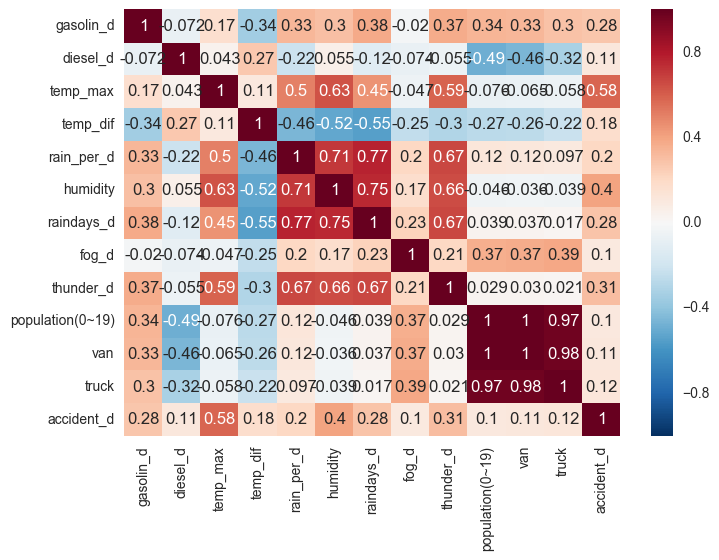

In [73]:
sns.heatmap(xs_corr, annot=True)
plt.show()

In [63]:
x = xs_corr.columns[2]
print xs_corr[x][xs_corr[x]>0.8]

temp         1.000000
temp_max     0.997436
temp_min     0.998084
dew_point    0.987867
Name: temp, dtype: float64


In [64]:
corr_y[['temp','temp_max','temp_min','dew_point']] # temp_max 선택

temp         0.576345
temp_max     0.583617
temp_min     0.563287
dew_point    0.570338
Name: accident_d, dtype: float64

In [65]:
del xs['temp']
del xs['temp_min']
del xs['dew_point']

In [66]:
xs_corr = xs.corr()
x = xs_corr.columns[5]
print xs_corr[x][xs_corr[x]>0.8]

humidity        1.000000
humidity_min    0.851881
Name: humidity, dtype: float64


In [67]:
corr_y[['humidity','humidity_min']]

humidity        0.400085
humidity_min    0.206817
Name: accident_d, dtype: float64

In [68]:
del xs['humidity_min']

In [69]:
xs_corr = xs.corr()
x = xs_corr.columns[9]
print xs_corr[x][xs_corr[x]>0.8]

population(0~19)    1.000000
van                 0.997942
truck               0.970114
Name: population(0~19), dtype: float64


In [70]:
corr_y[['population(0~19)','van','truck']]

population(0~19)    0.102741
van                 0.112691
truck               0.124618
Name: accident_d, dtype: float64

In [71]:
del xs['population(0~19)']
del xs['van']

In [72]:
xs.head()

,gasolin_d,diesel_d,temp_max,temp_dif,rain_per_d,humidity,raindays_d,fog_d,thunder_d,truck,accident_d
0,27.129032,30.806452,1.9,6.9,0.570968,50,0.096774,0.064516,0.000000,386614,84.000000
1,28.678571,30.107143,3.2,8.1,0.535714,46,0.107143,0.000000,0.000000,386352,91.392857
2,27.806452,31.580645,11.9,8.2,1.738710,56,0.322581,0.000000,0.000000,385691,102.709677
3,29.466667,32.300000,19.5,10.2,1.283333,50,0.400000,0.000000,0.066667,385167,113.033333
4,28.870968,30.741935,22.7,9.6,3.151613,58,0.258065,0.096774,0.129032,384894,123.741935


Feature ranking:
1. feature 2 (0.374187)
2. feature 6 (0.115159)
3. feature 0 (0.087813)
4. feature 9 (0.087028)
5. feature 5 (0.076637)
6. feature 7 (0.059269)
7. feature 8 (0.056957)
8. feature 1 (0.053813)
9. feature 3 (0.048525)
10. feature 4 (0.040611)


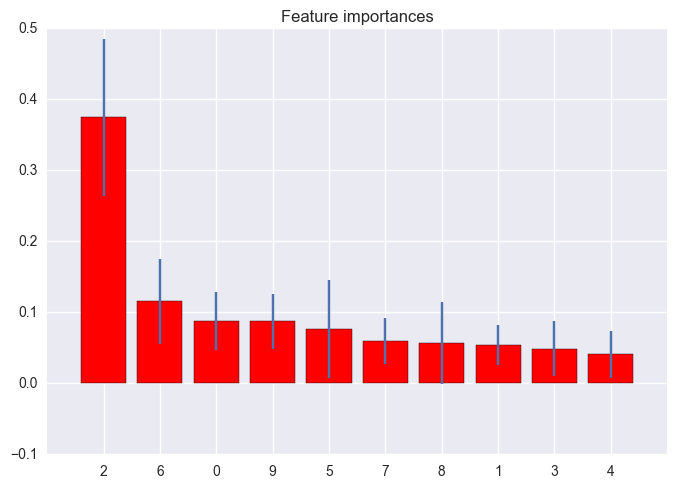

In [74]:
#Random Forest로 feature 순위 정하기
from sklearn.ensemble import ExtraTreesRegressor

X, y = xs.ix[:,:-1], xs.ix[:,-1]

forest = ExtraTreesRegressor(n_estimators=250, random_state=0)
forest.fit(X, y)

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [75]:
a = [2,6,0,9,5,7,8,1,3,4,10]
df2 = pd.DataFrame(data = scale(xs[a]), columns = xs.columns[a])
df2.head()

,temp_max,raindays_d,gasolin_d,truck,humidity,fog_d,thunder_d,diesel_d,temp_dif,rain_per_d,accident_d
0,-1.488041,-1.470083,-0.681584,1.977237,-1.247109,1.107256,-0.793552,0.579235,-1.076974,-0.573986,-2.872821
1,-1.361787,-1.398840,0.339946,1.956206,-1.731815,-0.625874,-0.793552,0.437387,-0.186964,-0.579949,-2.144083
2,-0.516854,0.081418,-0.234997,1.903147,-0.520049,-0.625874,-0.793552,0.736272,-0.112796,-0.376452,-1.028547
3,0.221249,0.613361,0.859496,1.861084,-1.247109,-0.625874,0.043009,0.882186,1.370553,-0.453483,-0.010910
4,0.532029,-0.361868,0.466783,1.839170,-0.277696,1.973821,0.825597,0.566148,0.925548,-0.137447,1.044672


In [76]:
# Forward 방식
fs2 = df2[['temp_max','raindays_d','accident_d']]
df_accident = sm.add_constant(fs2)
model_accident1 = sm.OLS(df_accident.ix[:, -1], df_accident.ix[:, :-1])
result_accident1 = model_accident1.fit()
result_accident1
print(result_accident1.summary())

                            OLS Regression Results                            
Dep. Variable:             accident_d   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     24.07
Date:                Fri, 11 Nov 2016   Prob (F-statistic):           3.76e-09
Time:                        20:56:59   Log-Likelihood:                -116.19
No. Observations:                  96   AIC:                             238.4
Df Residuals:                      93   BIC:                             246.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        2.03e-15      0.084   2.41e-14      1.0

In [77]:
fs2 = df2[['temp_max','raindays_d','gasolin_d','accident_d']]
df_accident = sm.add_constant(fs2)
model_accident1 = sm.OLS(df_accident.ix[:, -1], df_accident.ix[:, :-1])
result_accident1 = model_accident1.fit()
result_accident1
print(result_accident1.summary())

                            OLS Regression Results                            
Dep. Variable:             accident_d   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     18.41
Date:                Fri, 11 Nov 2016   Prob (F-statistic):           1.95e-09
Time:                        20:57:19   Log-Likelihood:                -113.65
No. Observations:                  96   AIC:                             235.3
Df Residuals:                      92   BIC:                             245.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        2.03e-15      0.082   2.46e-14      1.0

In [78]:
fs2 = df2[['temp_max','raindays_d','gasolin_d','truck','accident_d']]
df_accident = sm.add_constant(fs2)
model_accident1 = sm.OLS(df_accident.ix[:, -1], df_accident.ix[:, :-1])
result_accident1 = model_accident1.fit()
result_accident1
print(result_accident1.summary())

                            OLS Regression Results                            
Dep. Variable:             accident_d   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     14.32
Date:                Fri, 11 Nov 2016   Prob (F-statistic):           4.19e-09
Time:                        20:57:30   Log-Likelihood:                -112.79
No. Observations:                  96   AIC:                             235.6
Df Residuals:                      91   BIC:                             248.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        2.03e-15      0.082   2.47e-14      1.0

In [79]:
fs2 = df2[['temp_max','raindays_d','gasolin_d','truck','humidity','accident_d']]
df_accident = sm.add_constant(fs2)
model_accident1 = sm.OLS(df_accident.ix[:, -1], df_accident.ix[:, :-1])
result_accident1 = model_accident1.fit()
result_accident1
print(result_accident1.summary())

                            OLS Regression Results                            
Dep. Variable:             accident_d   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     11.38
Date:                Fri, 11 Nov 2016   Prob (F-statistic):           1.59e-08
Time:                        20:58:31   Log-Likelihood:                -112.70
No. Observations:                  96   AIC:                             237.4
Df Residuals:                      90   BIC:                             252.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        2.03e-15      0.083   2.46e-14      1.0

In [80]:
fs2 = df2[['temp_max','raindays_d','gasolin_d','truck','humidity','fog_d','accident_d']]
df_accident = sm.add_constant(fs2)
model_accident1 = sm.OLS(df_accident.ix[:, -1], df_accident.ix[:, :-1])
result_accident1 = model_accident1.fit()
result_accident1
print(result_accident1.summary())

                            OLS Regression Results                            
Dep. Variable:             accident_d   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     9.883
Date:                Fri, 11 Nov 2016   Prob (F-statistic):           2.45e-08
Time:                        20:58:40   Log-Likelihood:                -111.71
No. Observations:                  96   AIC:                             237.4
Df Residuals:                      89   BIC:                             255.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        2.03e-15      0.082   2.47e-14      1.0

In [81]:
fs2 = df2[['temp_max','raindays_d','gasolin_d','truck','humidity','fog_d','thunder_d','accident_d']]
df_accident = sm.add_constant(fs2)
model_accident1 = sm.OLS(df_accident.ix[:, -1], df_accident.ix[:, :-1])
result_accident1 = model_accident1.fit()
result_accident1
print(result_accident1.summary())

                            OLS Regression Results                            
Dep. Variable:             accident_d   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     8.962
Date:                Fri, 11 Nov 2016   Prob (F-statistic):           2.68e-08
Time:                        20:58:55   Log-Likelihood:                -110.39
No. Observations:                  96   AIC:                             236.8
Df Residuals:                      88   BIC:                             257.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        2.03e-15      0.081   2.49e-14      1.0

In [82]:
fs2 = df2[['temp_max','raindays_d','gasolin_d','truck','humidity','fog_d','thunder_d','diesel_d','accident_d']]
df_accident = sm.add_constant(fs2)
model_accident1 = sm.OLS(df_accident.ix[:, -1], df_accident.ix[:, :-1])
result_accident1 = model_accident1.fit()
result_accident1
print(result_accident1.summary())

                            OLS Regression Results                            
Dep. Variable:             accident_d   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     8.195
Date:                Fri, 11 Nov 2016   Prob (F-statistic):           3.34e-08
Time:                        20:59:03   Log-Likelihood:                -109.26
No. Observations:                  96   AIC:                             236.5
Df Residuals:                      87   BIC:                             259.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        2.03e-15      0.081   2.51e-14      1.0

In [83]:
fs2 = df2[['temp_max','raindays_d','gasolin_d','truck','humidity','fog_d','thunder_d','diesel_d','temp_dif','accident_d']]
df_accident = sm.add_constant(fs2)
model_accident1 = sm.OLS(df_accident.ix[:, -1], df_accident.ix[:, :-1])
result_accident1 = model_accident1.fit()
result_accident1
print(result_accident1.summary())

                            OLS Regression Results                            
Dep. Variable:             accident_d   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     10.28
Date:                Fri, 11 Nov 2016   Prob (F-statistic):           1.32e-10
Time:                        20:59:12   Log-Likelihood:                -101.16
No. Observations:                  96   AIC:                             222.3
Df Residuals:                      86   BIC:                             248.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        2.03e-15      0.075   2.71e-14      1.0

In [84]:
fs2 = df2[['temp_max','raindays_d','gasolin_d','truck','humidity','fog_d','thunder_d','diesel_d','temp_dif','rain_per_d','accident_d']]
df_accident = sm.add_constant(fs2)
model_accident1 = sm.OLS(df_accident.ix[:, -1], df_accident.ix[:, :-1])
result_accident1 = model_accident1.fit()
result_accident1
print(result_accident1.summary())

                            OLS Regression Results                            
Dep. Variable:             accident_d   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     10.14
Date:                Fri, 11 Nov 2016   Prob (F-statistic):           5.17e-11
Time:                        20:59:21   Log-Likelihood:                -98.524
No. Observations:                  96   AIC:                             219.0
Df Residuals:                      85   BIC:                             247.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        2.03e-15      0.073   2.77e-14      1.0

In [85]:
# Backward 방식
# diesel_d 제거
fs2 = df2[['temp_max','raindays_d','gasolin_d','truck','humidity','fog_d','thunder_d','temp_dif','rain_per_d','accident_d']]
df_accident = sm.add_constant(fs2)
model_accident1 = sm.OLS(df_accident.ix[:, -1], df_accident.ix[:, :-1])
result_accident1 = model_accident1.fit()
result_accident1
print(result_accident1.summary())

                            OLS Regression Results                            
Dep. Variable:             accident_d   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     11.36
Date:                Fri, 11 Nov 2016   Prob (F-statistic):           1.59e-11
Time:                        20:59:50   Log-Likelihood:                -98.616
No. Observations:                  96   AIC:                             217.2
Df Residuals:                      86   BIC:                             242.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        2.03e-15      0.073   2.79e-14      1.0

In [86]:
# fog_d 제거
fs2 = df2[['temp_max','raindays_d','gasolin_d','truck','humidity','thunder_d','temp_dif','rain_per_d','accident_d']]
df_accident = sm.add_constant(fs2)
model_accident1 = sm.OLS(df_accident.ix[:, -1], df_accident.ix[:, :-1])
result_accident1 = model_accident1.fit()
result_accident1
print(result_accident1.summary())

                            OLS Regression Results                            
Dep. Variable:             accident_d   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     12.43
Date:                Fri, 11 Nov 2016   Prob (F-statistic):           1.01e-11
Time:                        21:00:40   Log-Likelihood:                -99.637
No. Observations:                  96   AIC:                             217.3
Df Residuals:                      87   BIC:                             240.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        2.03e-15      0.073   2.77e-14      1.0

In [87]:
# thunder_d 제거
fs2 = df2[['temp_max','raindays_d','gasolin_d','truck','humidity','temp_dif','rain_per_d','accident_d']]
df_accident = sm.add_constant(fs2)
model_accident1 = sm.OLS(df_accident.ix[:, -1], df_accident.ix[:, :-1])
result_accident1 = model_accident1.fit()
result_accident1
print(result_accident1.summary())

                            OLS Regression Results                            
Dep. Variable:             accident_d   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     14.17
Date:                Fri, 11 Nov 2016   Prob (F-statistic):           3.47e-12
Time:                        21:00:56   Log-Likelihood:                -99.995
No. Observations:                  96   AIC:                             216.0
Df Residuals:                      88   BIC:                             236.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        2.03e-15      0.073   2.78e-14      1.0

In [88]:
# temp_max 제거
fs2 = df2[['raindays_d','gasolin_d','truck','humidity','temp_dif','rain_per_d','accident_d']]
df_accident = sm.add_constant(fs2)
model_accident1 = sm.OLS(df_accident.ix[:, -1], df_accident.ix[:, :-1])
result_accident1 = model_accident1.fit()
result_accident1
print(result_accident1.summary())

                            OLS Regression Results                            
Dep. Variable:             accident_d   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     15.94
Date:                Fri, 11 Nov 2016   Prob (F-statistic):           2.33e-12
Time:                        21:01:30   Log-Likelihood:                -101.19
No. Observations:                  96   AIC:                             216.4
Df Residuals:                      89   BIC:                             234.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        2.03e-15      0.074   2.76e-14      1.0

In [89]:
# raindays_d 제거
fs2 = df2[['gasolin_d','truck','humidity','temp_dif','rain_per_d','accident_d']]
df_accident = sm.add_constant(fs2)
model_accident1 = sm.OLS(df_accident.ix[:, -1], df_accident.ix[:, :-1])
result_accident1 = model_accident1.fit()
result_accident1
print(result_accident1.summary())

                            OLS Regression Results                            
Dep. Variable:             accident_d   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     18.03
Date:                Fri, 11 Nov 2016   Prob (F-statistic):           2.38e-12
Time:                        21:01:52   Log-Likelihood:                -102.91
No. Observations:                  96   AIC:                             217.8
Df Residuals:                      90   BIC:                             233.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        2.03e-15      0.075   2.72e-14      1.0

In [90]:
# rain_per_d 제거
fs2 = df2[['gasolin_d','truck','humidity','temp_dif','accident_d']]
df_accident = sm.add_constant(fs2)
model_accident1 = sm.OLS(df_accident.ix[:, -1], df_accident.ix[:, :-1])
result_accident1 = model_accident1.fit()
result_accident1
print(result_accident1.summary())

                            OLS Regression Results                            
Dep. Variable:             accident_d   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     21.75
Date:                Fri, 11 Nov 2016   Prob (F-statistic):           1.28e-12
Time:                        21:02:21   Log-Likelihood:                -104.01
No. Observations:                  96   AIC:                             218.0
Df Residuals:                      91   BIC:                             230.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        2.03e-15      0.075   2.71e-14      1.0

변수들을 계속적으로 제거한 결과, temp_max 이후로 성능이 저하되어 
### **gasolin_d, truck, humidity, temp_dif**를 feature로 하는 모델 선택

# ===============================================


# 2. 아웃라이어 검사

In [145]:
result = result_accident2 # fitting 한 모델을 입력

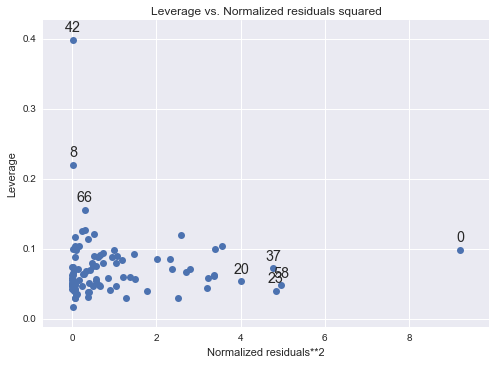

In [147]:
sm.graphics.plot_leverage_resid2(result)
plt.show()

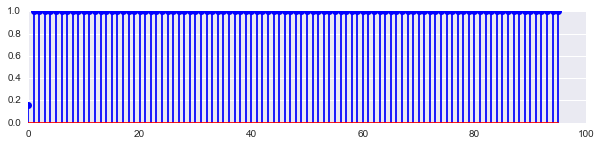

In [148]:
plt.figure(figsize=(10, 2))
plt.stem(result.outlier_test().ix[:, -1]) # 귀무가설: 이상치가 아니다
plt.show()

In [149]:
outliertest = result.outlier_test().ix[:,-1]
outliertest[outliertest<0.01]

Series([], Name: bonf(p), dtype: float64)

In [150]:
#df2.drop(df2.index[[1]]) # 이상치 없음
df2.head()

,dew_point,temp_min,temp,temp_max,raindays_d,gasolin_d,frost_d,snow_d,sedan,diesel_d
0,-1.474496,-1.354108,-1.412185,-1.488041,-1.470083,-0.681584,1.365867,0.697619,-1.735758,0.579235
1,-1.537737,-1.344345,-1.363129,-1.361787,-1.398840,0.339946,2.096371,0.840581,-1.605735,0.437387
2,-0.562018,-0.504727,-0.529186,-0.516854,0.081418,-0.234997,0.216759,0.364041,-1.508212,0.736272
3,-0.146433,0.042001,0.137969,0.221249,0.613361,0.859496,-0.702528,-0.636692,-1.399877,0.882186
4,0.341427,0.412995,0.491168,0.532029,-0.361868,0.466783,-0.702528,-0.636692,-1.292133,0.566148


# ===============================================

# 3. StratifiedKFold 검정 실시

Backward 방식으로 진행한 Single Coefficient t-test, Loss-of-Fit test 결과 값으로 검증함

## 1) Backward 방식 StratifiedKFold 검정

In [217]:
y_bw = df_accident_bw.ix[:, -1] 
X_bw = df_accident_bw.ix[:, :-1]

In [218]:
from sklearn.cross_validation import StratifiedKFold
cv = StratifiedKFold(y_bw, n_folds=10, shuffle = True, random_state=20)
cv

sklearn.cross_validation.StratifiedKFold(labels=[-2.87282112 -2.14408289 -1.02854671 -0.01091001  1.0446721   1.67140742
  1.41352698  0.5263674   0.44252711  0.55498545  0.93539354  0.45641216
 -1.27021026 -0.34864087  0.20520927  0.58381548  0.94609881  1.10296813
  1.66790966  0.49456956  2.22998938  1.91911255  0.99125174  1.01923383
 -1.28292939 -0.78870019 -0.39576981  0.36695425  0.66627787  0.33409649
  0.07801793  0.14797317  0.59038704  1.32767283  0.51809996 -0.61517486
 -1.4927951  -2.09479625 -1.21297415  0.18295078  0.30378255 -0.01419579
  0.06847858 -0.46890483  0.12709259  0.72033419  1.00768062  0.02078183
 -1.6454247  -0.7212042  -0.48162396  0.18623656  0.31014212  0.52795729
  0.23382732 -0.32581457  0.28152407 -0.16364561  0.74481852 -0.78688317
 -1.59772795 -2.13352147 -0.62471421 -0.1094833   0.43097389  0.47867065
 -0.6469727  -0.7423662  -0.42491782  0.24972624  0.25523786 -1.24477199
 -2.60889909 -2.11943957 -0.54839941 -0.25734323  0.38327714  0.59695859
  0

In [219]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [220]:
from sklearn.cross_validation import cross_val_score
score_bw = cross_val_score(model, X_bw, y_bw, cv = cv)
print score_bw

[ 0.49982496  0.25737046  0.3695134   0.44602234  0.13653528 -0.44474717
 -0.13153433  0.28364715  0.46609772 -0.53764019]


In [221]:
np.mean(score_bw)

0.13450896228104756

# =============================================

## 2) Random Forest 방식 StratifiedKFold 검정

In [246]:
y_RF = df_accident_RF.ix[:, -1]
X_RF = df_accident_RF.ix[:, :-1]

In [247]:
from sklearn.cross_validation import StratifiedKFold
cv = StratifiedKFold(y_RF, n_folds=10, shuffle = True, random_state=20)
cv

sklearn.cross_validation.StratifiedKFold(labels=[-2.87282112 -2.14408289 -1.02854671 -0.01091001  1.0446721   1.67140742
  1.41352698  0.5263674   0.44252711  0.55498545  0.93539354  0.45641216
 -1.27021026 -0.34864087  0.20520927  0.58381548  0.94609881  1.10296813
  1.66790966  0.49456956  2.22998938  1.91911255  0.99125174  1.01923383
 -1.28292939 -0.78870019 -0.39576981  0.36695425  0.66627787  0.33409649
  0.07801793  0.14797317  0.59038704  1.32767283  0.51809996 -0.61517486
 -1.4927951  -2.09479625 -1.21297415  0.18295078  0.30378255 -0.01419579
  0.06847858 -0.46890483  0.12709259  0.72033419  1.00768062  0.02078183
 -1.6454247  -0.7212042  -0.48162396  0.18623656  0.31014212  0.52795729
  0.23382732 -0.32581457  0.28152407 -0.16364561  0.74481852 -0.78688317
 -1.59772795 -2.13352147 -0.62471421 -0.1094833   0.43097389  0.47867065
 -0.6469727  -0.7423662  -0.42491782  0.24972624  0.25523786 -1.24477199
 -2.60889909 -2.11943957 -0.54839941 -0.25734323  0.38327714  0.59695859
  0

In [248]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [249]:
from sklearn.cross_validation import cross_val_score
score_RF = cross_val_score(model, X_RF, y_RF, cv = cv)
print score_RF

[ 0.63071536  0.17567496  0.05260325  0.42181029  0.53841503  0.19775073
  0.35545418  0.33245374  0.69119142 -1.12611215]


In [250]:
np.mean(score_RF)

0.22699568185675253

# ==================================================

## * 마무리

1. y값을 **일 평균 교통사고량**으로 변경하면서 기존 feature 항목에서 가장 영향력이 가장 높던 days항목을 없앴다. 가중치가 높던 Feature값 하나가 사라지니 다른 조합을 아무리 해보아도 모델의 성능이 좀처럼 좋아지지 않는 경향을 보였다.
2. 일반적인 상식 선에서 생각해봤을 때, 가중치가 높을 것 같다고 생각했던 Feature들(유류량, 기후요인, 인구 등)이 생각보다 높지않은 가중치를 보였다.
3. 시간에 따라서 일정하게 변하는 시계열 경향을 보이는 데이터들이 많았기 때문에 따로 처리하지 못한 부분이 아쉽다.